'''<br>
    @Author: Deven Gupta<br>
    @Date: 11-09-2024<br>
    @Last Modified by: Deven Gupta<br>
    @Last Modified time: 11-09-2024 <br>
    @Title :  Python programs to Transfer data (.csv as well as large files) from local system to AWS -S3 and vice versa<br>
    <br>
'''

In [22]:
import boto3
from dotenv import load_dotenv
import pandas as pd
from tqdm import tqdm
import os

In [2]:
load_dotenv()

True

In [3]:
s3_client = boto3.client('s3')

## UPLOADING (Local System to AWS S3)

In [6]:
os.listdir()

['.env',
 '1.jpg',
 'boto3_s3_CRUD.ipynb',
 'boto3_s3_file_transfer.ipynb',
 'demo.txt',
 'file.csv',
 'file_downloaded.txt',
 'local_file.txt',
 'user-deven_accessKeys.csv']

In [5]:
# 1. Uploading CSV File

s3_client.upload_file('file.csv','deven-boto-bucket-crud','file.csv')

In [16]:
#List Objects in a Bucket
response = s3_client.list_objects_v2(Bucket='deven-boto-bucket-crud')
objects = response.get('Contents', [])

for obj in objects:
    print(obj['Key'])

file.csv


In [14]:
df =pd.read_csv('s3://deven-boto-bucket-crud/file.csv')

In [15]:
df

,Rollno,FirstName,LastName,Dept
0,1,Deven,Gupta,IT
1,2,Ayush,Prajapati,Comps
2,3,Prayag,Bhoir,IT
3,4,Shiv,Yelve,Comps


In [19]:
from boto3.s3.transfer import TransferConfig

In [20]:
# To handle large file use multipart (Chunks)

config = TransferConfig(
    multipart_threshold=1024 * 1024 * 8,  # 8 MB threshold for multipart upload
    max_concurrency=10,                    # 10 concurrent threads
    multipart_chunksize=1024 * 1024 * 8,   # 8 MB chunk size
    use_threads=True
)


In [23]:
# 2. Uploading Large File
large_file_path ='D:/Downloads/The Well 2023.mkv'
file_size = os.path.getsize(large_file_path)

with tqdm(total=file_size, unit='B', unit_scale=True, desc=large_file_path) as pbar:
    def progress_hook(bytes_transferred):
        pbar.update(bytes_transferred)

    s3_client.upload_file(large_file_path, 'deven-boto-bucket-crud', 'The Well 2023.mkv', Config=config, Callback=progress_hook)

D:/Downloads/The Well 2023.mkv: 100%|██████████| 2.09G/2.09G [18:23<00:00, 1.90MB/s] 


## SCREENSHOT
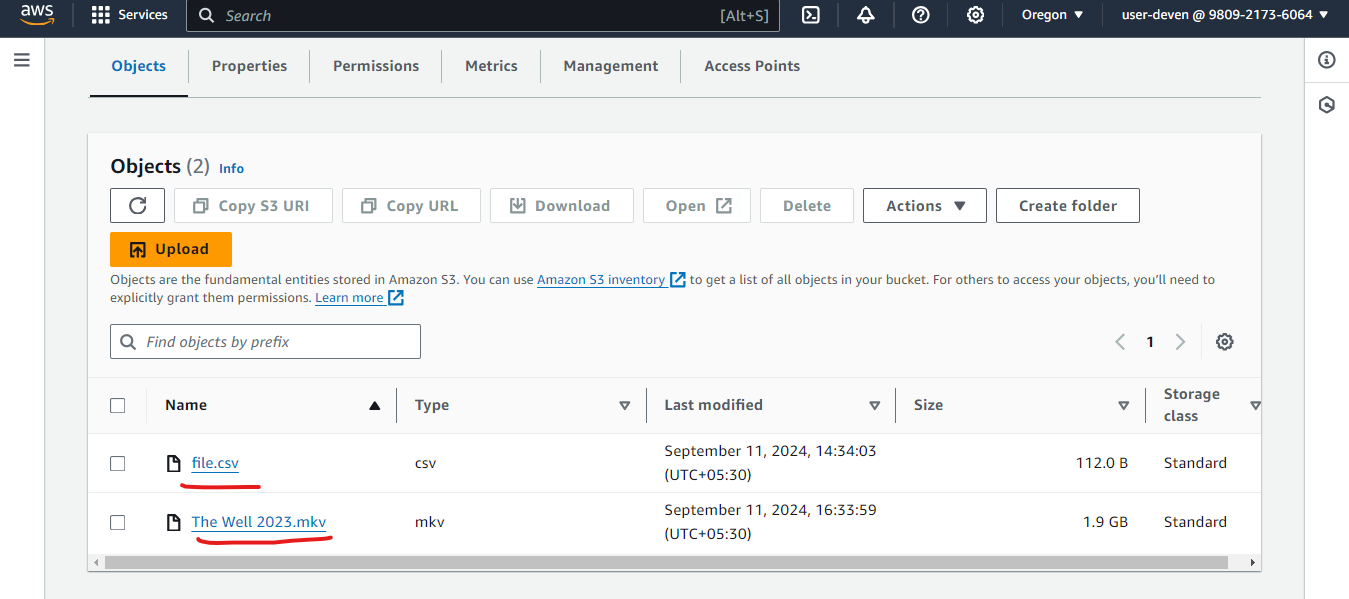

## DOWNLOADING (AWS S3 To Local System)

In [24]:
# 1. Download CSV File

s3_client.download_file('deven-boto-bucket-crud','file.csv','file_download.csv')

In [27]:
# 2. Download Large file

file_size = s3_client.head_object(Bucket='deven-boto-bucket-crud', Key='The Well 2023.mkv')['ContentLength']

with tqdm(total=file_size, unit='B', unit_scale=True, desc='The Well 2023.mkv') as pbar:
    def progress_hook(bytes_transferred):
        pbar.update(bytes_transferred)

    s3_client.download_file('deven-boto-bucket-crud', 'The Well 2023.mkv','The Well 2023.mkv', Config=config, Callback=progress_hook)

The Well 2023.mkv: 100%|██████████| 2.09G/2.09G [04:28<00:00, 7.79MB/s] 


## SCREENSHOT

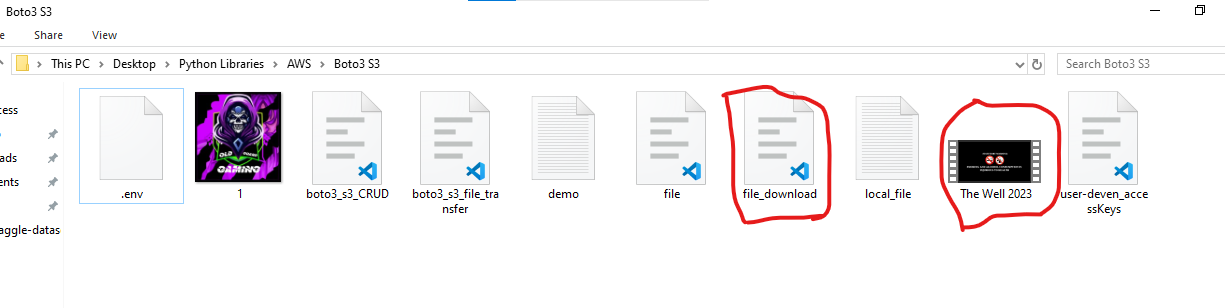